In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/content/train.csv")
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [3]:
df.shape

(36992, 25)

In [4]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [6]:
df.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [7]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [8]:
type(df['Name'])

pandas.core.series.Series

In [9]:
df['Name']

0         Pattie Morrisey
1             Traci Peery
2         Merideth Mcmeen
3        Eufemia Cardwell
4            Meghan Kosak
               ...       
36987            Cuc Tarr
36988      Jenni Stronach
36989       Luciana Kinch
36990       Tawana Ardoin
36991    Verlene Beaulieu
Name: Name, Length: 36992, dtype: object

In [10]:
df[['Name', 'internet_option']]

,Name,internet_option
0,Pattie Morrisey,Wi-Fi
1,Traci Peery,Mobile_Data
2,Merideth Mcmeen,Wi-Fi
3,Eufemia Cardwell,Mobile_Data
4,Meghan Kosak,Mobile_Data
...,...,...
36987,Cuc Tarr,Wi-Fi
36988,Jenni Stronach,Wi-Fi
36989,Luciana Kinch,Wi-Fi
36990,Tawana Ardoin,Mobile_Data


In [11]:
df.internet_option.value_counts()

internet_option
Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [13]:
df.region_category.mode()[0]

'Town'

In [14]:
# filling categorical missing column
df['region_category']= df['region_category'].fillna(df['region_category'].mode()[0])
df['preferred_offer_types']= df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0])
# handle numerical missing column
df['points_in_wallet']= df['points_in_wallet'].fillna(df['points_in_wallet'].mean())
df.isnull().sum()

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [15]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,184.811682,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,624.350000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,686.882199,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,757.002500,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [16]:
df1 = df[['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet', 'churn_risk_score']]

<ipython-input-17-3a8b645d749f>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])
<ipython-input-17-3a8b645d749f>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])
<ipython-input-17-3a8b645d749f>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in

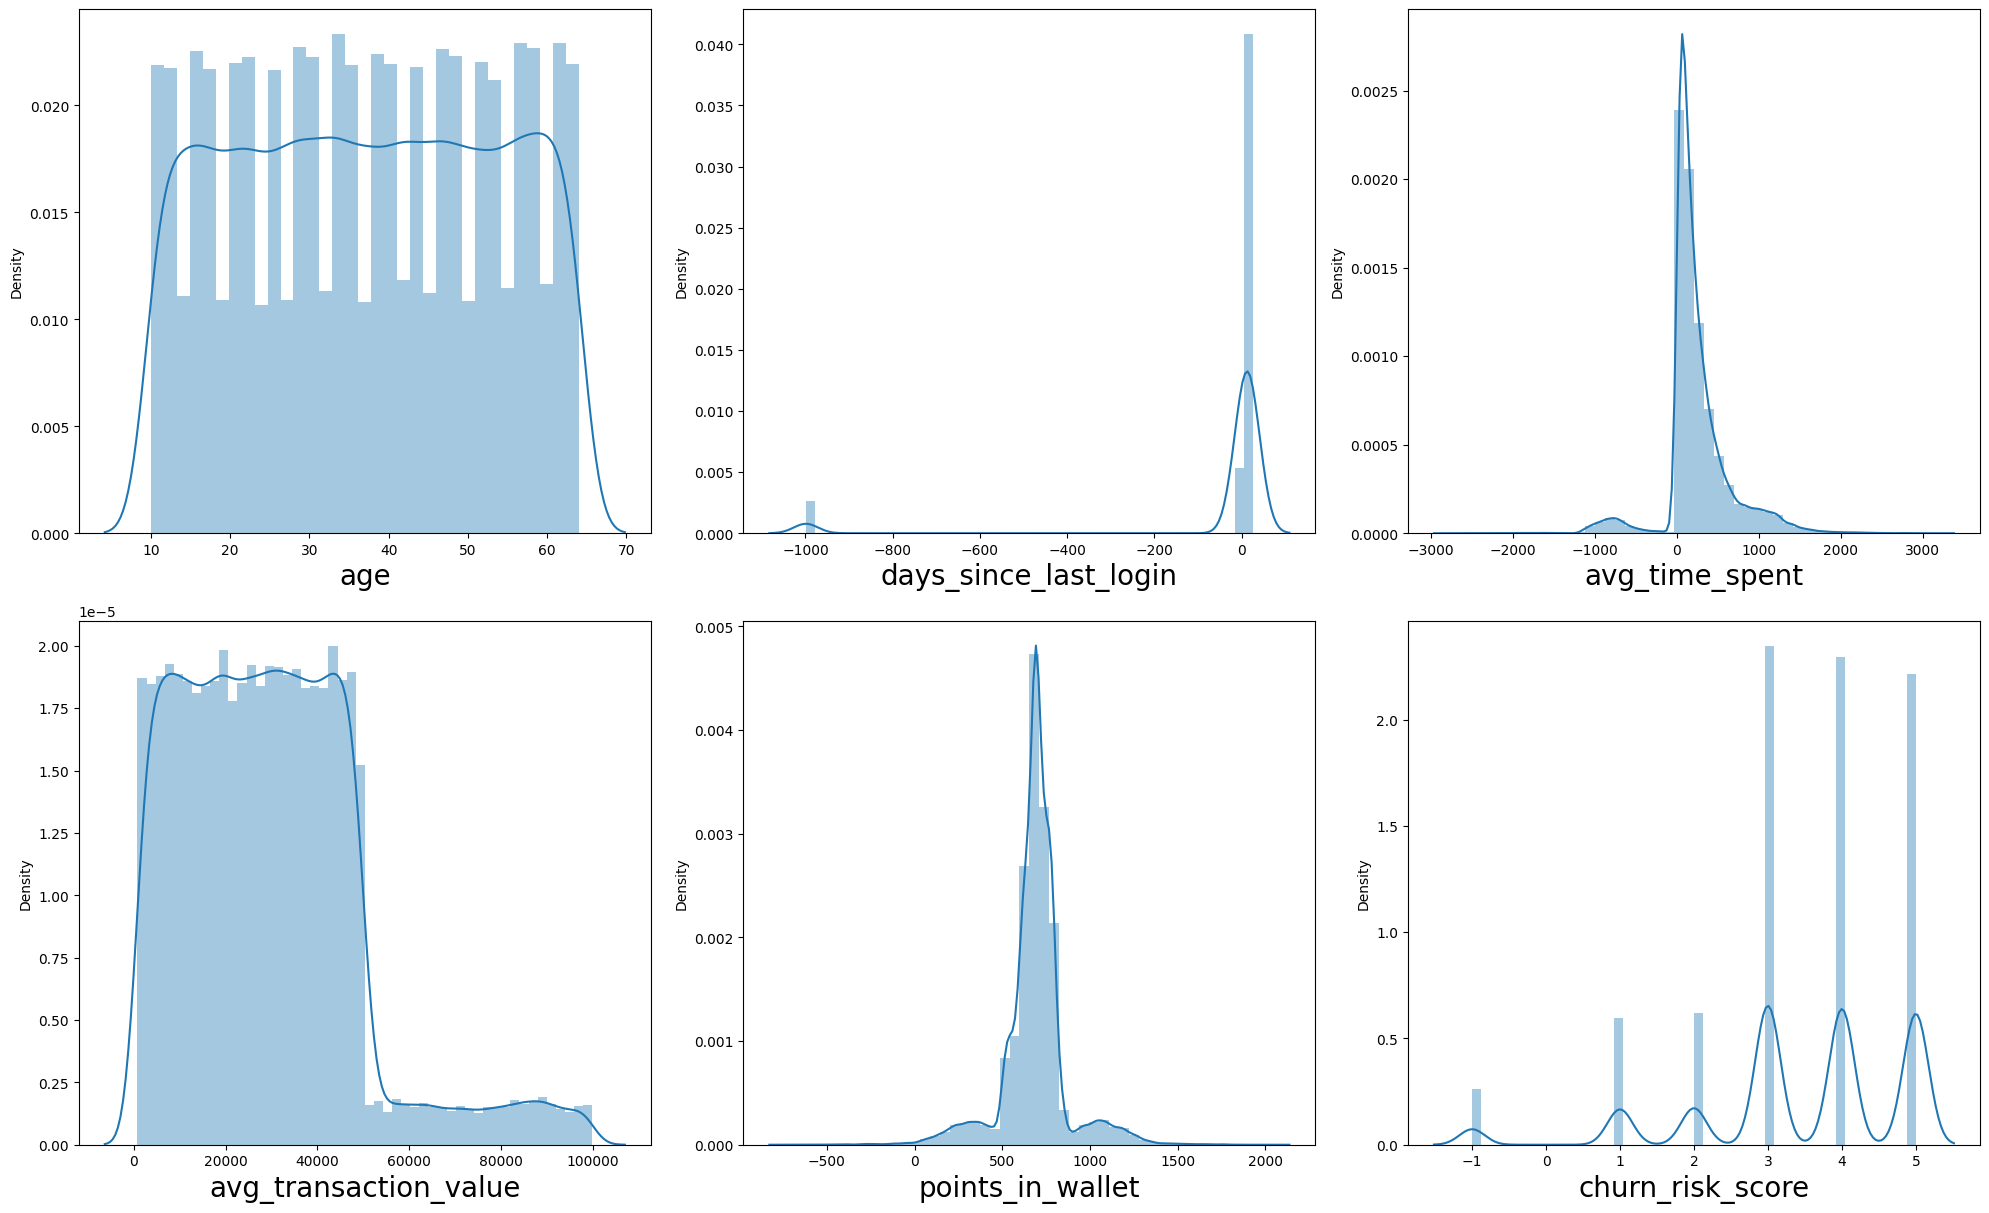

In [17]:
# lets see how data is distributed for every column
import seaborn as sns
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in df1:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column, fontsize=20)

    plotnumber+=1
plt.tight_layout()

In [18]:
df[['joining_date']].head()

,joining_date
0,2017-08-17
1,2017-08-28
2,2016-11-11
3,2016-10-29
4,2017-09-12


In [21]:
 # Convert 'joining_date' column to datetime format
df['joining_date'] = pd.to_datetime(df['joining_date'], format="%Y-%m-%d")

# Extract day, month, and year from 'joining_date'
df['joining_day'] = df['joining_date'].dt.day
df['joining_month'] = df['joining_date'].dt.month
df['joining_year'] = df['joining_date'].dt.year

In [22]:
df.drop(["joining_date"], axis=1, inplace=True)

In [23]:
df[['last_visit_time']].head()

,last_visit_time
0,16:08:02
1,12:38:13
2,22:53:21
3,15:57:50
4,15:46:44


In [24]:
# extract hour, minutes and seconds
df[['last_visit_time_hour','last_visit_time_minutes','last_visit_time_seconds']] = df['last_visit_time'].astype(str).str.split(':', expand=True).astype(int)
# drop column
df.drop(['last_visit_time'], axis=1, inplace=True)

handle categorical columns

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               36992 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36992 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  days_since_last_login         36992 non-null  int64  
 13  a

In [26]:
df['gender'].value_counts()

gender
F          18490
M          18443
Unknown       59
Name: count, dtype: int64

In [27]:
gender = pd.get_dummies(df[['gender']], drop_first=True)
gender.head()

,gender_M,gender_Unknown
0,False,False
1,False,False
2,False,False
3,True,False
4,False,False


In [28]:
df['region_category'].value_counts()

region_category
Town       19556
City       12737
Village     4699
Name: count, dtype: int64

In [29]:
region = pd.get_dummies(df[['region_category']], drop_first=True)
region.head()

,region_category_Town,region_category_Village
0,False,True
1,False,False
2,True,False
3,False,False
4,False,False


In [30]:
df['membership_category'].value_counts()
membership = pd.get_dummies(df[['membership_category']], drop_first=True)
membership.head()

,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership
0,False,False,True,False,False
1,False,False,False,True,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False


In [31]:
df.joined_through_referral.value_counts()
referal = pd.get_dummies(df[['joined_through_referral']], drop_first=True)
referal.head()

,joined_through_referral_No,joined_through_referral_Yes
0,True,False
1,False,False
2,False,True
3,False,True
4,True,False


In [32]:
df.preferred_offer_types.value_counts()
offer = pd.get_dummies(df[['preferred_offer_types']], drop_first=True)
offer.head()

,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers
0,True,False
1,True,False
2,True,False
3,True,False
4,False,False


In [33]:
df.medium_of_operation.value_counts()
medium = pd.get_dummies(df[['medium_of_operation']], drop_first=True)
medium.head()

,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone
0,False,False,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,False,True


In [34]:
df['internet_option'].value_counts()
internet = pd.get_dummies(df[['internet_option']], drop_first=True)
internet.head()

,internet_option_Mobile_Data,internet_option_Wi-Fi
0,False,True
1,True,False
2,False,True
3,True,False
4,True,False


In [35]:
df.used_special_discount.value_counts()
discount = pd.get_dummies(df[['used_special_discount']], drop_first=True)
discount.head()

,used_special_discount_Yes
0,True
1,True
2,False
3,False
4,False


In [36]:
df.offer_application_preference.value_counts()
application = pd.get_dummies(df[['offer_application_preference']], drop_first=True)
application.head()

,offer_application_preference_Yes
0,True
1,False
2,True
3,True
4,True


In [37]:
df.past_complaint.value_counts()
complaint = pd.get_dummies(df[['past_complaint']], drop_first=True)
complaint.head()

,past_complaint_Yes
0,False
1,True
2,True
3,True
4,True


In [38]:
df.feedback.value_counts()
feedback = pd.get_dummies(df[['feedback']], drop_first=True)
feedback.head()

,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False
2,False,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,True,False,False,False,False,False


In [39]:
# Concatenate dataframe -->

data_train = pd.concat([df, gender, region, membership, referal, offer, medium, internet, discount, application, complaint, feedback ], axis = 1)
data_train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,True,False,False,False,False,True,False,False,False,False
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,False,True,False,False,False,False,True,False,False,False
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,True,True,False,False,True,False,False,False,False,False
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,True,True,False,False,True,False,False,False,False,False
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,True,True,False,False,True,False,False,False,False,False


In [40]:
# drop unnecessary columns
data_train.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score',
       'joining_day', 'joining_month', 'joining_year', 'last_visit_time_hour',
       'last_visit_time_minutes', 'last_visit_time_seconds', 'gender_M',
       'gender_Unknown', 'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       

In [41]:
data_train.drop(["customer_id", "Name", "gender", "security_no", "region_category", "membership_category", "joined_through_referral", "referral_id", "preferred_offer_types", "medium_of_operation", "internet_option", "used_special_discount", "offer_application_preference", "past_complaint", "feedback", "avg_frequency_login_days" ], axis = 1, inplace = True)
data_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,complaint_status,churn_risk_score,joining_day,joining_month,joining_year,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.750000,Not Applicable,2,17,8,2017,...,True,False,False,False,False,True,False,False,False,False
1,32,16,306.34,12838.38,686.882199,Solved,1,28,8,2017,...,False,True,False,False,False,False,True,False,False,False
2,44,14,516.16,21027.00,500.690000,Solved in Follow-up,5,11,11,2016,...,True,True,False,False,True,False,False,False,False,False
3,37,11,53.27,25239.56,567.660000,Unsolved,5,29,10,2016,...,True,True,False,False,True,False,False,False,False,False
4,31,20,113.13,24483.66,663.060000,Solved,5,12,9,2017,...,True,True,False,False,True,False,False,False,False,False


In [42]:
data_train.shape

(36992, 42)

Test dataset

In [43]:
tf = pd.read_csv("/content/test.csv")
tf.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,...,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,...,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,...,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


In [65]:
# Preprocessing
import pandas as pd

# Load your DataFrame, assuming it's named `tf`
# Replace this with your actual DataFrame loading code
tf = pd.read_csv("/content/test.csv")

# Fill missing values in categorical columns
tf['region_category'] = tf['region_category'].fillna(tf['region_category'].mode()[0])
tf['preferred_offer_types'] = tf['preferred_offer_types'].fillna(tf['preferred_offer_types'].mode()[0])

# Fill missing values in numerical column
tf['points_in_wallet'] = tf['points_in_wallet'].fillna(tf['points_in_wallet'].mean())

# Drop 'complaint_status' column if it exists
if "complaint_status" in tf.columns:
    tf.drop(["complaint_status"], axis=1, inplace=True)
    print("Column 'complaint_status' dropped.")
else:
    print("Column 'complaint_status' not found in DataFrame. Skipping drop operation.")

# Convert 'joining_date' column to datetime format and extract date components
if 'joining_date' in tf.columns:
    tf['joining_date'] = pd.to_datetime(tf['joining_date'], format="%Y-%m-%d")
    tf['joining_day'] = tf['joining_date'].dt.day
    tf['joining_month'] = tf['joining_date'].dt.month
    tf['joining_year'] = tf['joining_date'].dt.year
    tf.drop(["joining_date"], axis=1, inplace=True)
else:
    print("Column 'joining_date' not found in DataFrame.")

# Extract hour, minute, and second from 'last_visit_time' if it exists
if 'last_visit_time' in tf.columns:
    tf[['last_visit_time_hour','last_visit_time_minutes','last_visit_time_seconds']] = tf['last_visit_time'].astype(str).str.split(':', expand=True).astype(int)
    tf.drop(["last_visit_time"], axis=1, inplace=True)
else:
    print("Column 'last_visit_time' not found in DataFrame.")

# Handling categorical data
categorical_columns = ["gender", "region_category", "membership_category", "joined_through_referral",
                       "preferred_offer_types", "medium_of_operation", "internet_option",
                       "used_special_discount", "offer_application_preference",
                       "past_complaint", "feedback"]

# One-hot encoding categorical columns
for col in categorical_columns:
    dummies = pd.get_dummies(tf[col], drop_first=True, prefix=col)
    tf = pd.concat([tf, dummies], axis=1)

# Drop original categorical columns
tf.drop(categorical_columns, axis=1, inplace=True)

# Drop unnecessary columns
columns_to_drop = ["customer_id", "security_no", "referral_id", "Name", "avg_frequency_login_days"]
tf.drop(columns_to_drop, axis=1, inplace=True)

# Display the head of the processed DataFrame
print(tf.head())


Column 'complaint_status' dropped.
   age  days_since_last_login  avg_time_spent  avg_transaction_value  \
0   50                     12          386.26               40721.44   
1   41                     11           37.80                9644.40   
2   31                     18          215.36                3693.25   
3   64                   -999           44.57               36809.56   
4   16                      6          349.88               40675.86   

   points_in_wallet  joining_day  joining_month  joining_year  \
0        733.830000            2             11          2015   
1        726.000000            1              3          2016   
2        713.780000            3              3          2017   
3        744.970000           18              8          2017   
4        299.048351            5              5          2015   

   last_visit_time_hour  last_visit_time_minutes  ...  \
0                     7                       19  ...   
1                    22    

In [66]:
data_test.head()

,customer_id,name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,No,xxxxxxxx,Without Offers,...,False,False,False,True,False,False,False,False,False,False
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,No,xxxxxxxx,Without Offers,...,False,False,False,False,True,False,False,False,False,False
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,False,True,False,False,False,False,False,False,False,False
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,Yes,CID8941,Credit/Debit Card Offers,...,False,True,False,False,False,False,False,False,True,False
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,Yes,CID5690,Without Offers,...,True,True,False,False,True,False,False,False,False,False


In [67]:
data_test.shape

(19919, 56)

Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods

In [68]:
data_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,complaint_status,churn_risk_score,joining_day,joining_month,joining_year,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.750000,Not Applicable,2,17,8,2017,...,True,False,False,False,False,True,False,False,False,False
1,32,16,306.34,12838.38,686.882199,Solved,1,28,8,2017,...,False,True,False,False,False,False,True,False,False,False
2,44,14,516.16,21027.00,500.690000,Solved in Follow-up,5,11,11,2016,...,True,True,False,False,True,False,False,False,False,False
3,37,11,53.27,25239.56,567.660000,Unsolved,5,29,10,2016,...,True,True,False,False,True,False,False,False,False,False
4,31,20,113.13,24483.66,663.060000,Solved,5,12,9,2017,...,True,True,False,False,True,False,False,False,False,False


In [69]:
data_train.columns

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'points_in_wallet', 'complaint_status',
       'churn_risk_score', 'joining_day', 'joining_month', 'joining_year',
       'last_visit_time_hour', 'last_visit_time_minutes',
       'last_visit_time_seconds', 'gender_M', 'gender_Unknown',
       'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_referral_Yes',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Both',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
       'used_special_discount_Yes', 'offer_appl

In [70]:
x = data_train.loc[:, ['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'points_in_wallet',
       'joining_day', 'joining_month', 'joining_year', 'last_visit_time_hour',
       'last_visit_time_minutes', 'last_visit_time_seconds', 'gender_M',
       'gender_Unknown', 'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_referral_Yes',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Both',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
       'used_special_discount_Yes', 'offer_application_preference_Yes',
       'past_complaint_Yes', 'feedback_Poor Customer Service',
       'feedback_Poor Product Quality', 'feedback_Poor Website',
       'feedback_Products always in Stock', 'feedback_Quality Customer Care',
       'feedback_Reasonable Price', 'feedback_Too many ads',
       'feedback_User Friendly Website']]
x.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minutes,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.750000,17,8,2017,16,8,...,True,False,False,False,False,True,False,False,False,False
1,32,16,306.34,12838.38,686.882199,28,8,2017,12,38,...,False,True,False,False,False,False,True,False,False,False
2,44,14,516.16,21027.00,500.690000,11,11,2016,22,53,...,True,True,False,False,True,False,False,False,False,False
3,37,11,53.27,25239.56,567.660000,29,10,2016,15,57,...,True,True,False,False,True,False,False,False,False,False
4,31,20,113.13,24483.66,663.060000,12,9,2017,15,46,...,True,True,False,False,True,False,False,False,False,False


In [71]:
y= data_train[['churn_risk_score']]
y.head()

,churn_risk_score
0,2
1,1
2,5
3,5
4,5


In [72]:
# important feature using extratreeregressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

<ipython-input-72-7043f4adfc9e>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(x,y)


ExtraTreesRegressor()

In [73]:
print(selection.feature_importances_)

[0.02419597 0.0207618  0.02502161 0.07001497 0.07405045 0.02380823
 0.02294657 0.01433327 0.02390505 0.02354704 0.02512285 0.00971115
 0.00033092 0.01122486 0.0072082  0.03020009 0.13141198 0.03730138
 0.03051706 0.05501398 0.00830258 0.00914698 0.009654   0.00976124
 0.0062118  0.00856708 0.00847874 0.00916738 0.00967479 0.00793829
 0.00701111 0.01137933 0.00822357 0.00793451 0.00688275 0.05203747
 0.05528135 0.04734297 0.00743275 0.04894386]


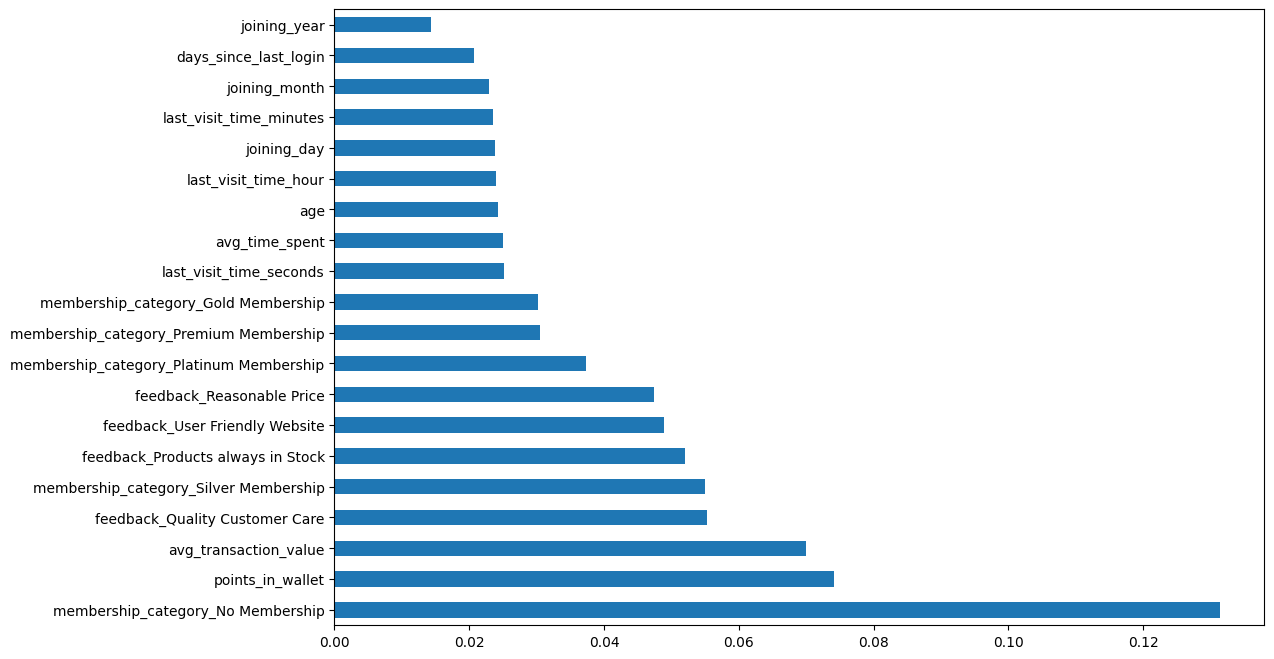

In [74]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

model training

In [75]:
data_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,complaint_status,churn_risk_score,joining_day,joining_month,joining_year,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.750000,Not Applicable,2,17,8,2017,...,True,False,False,False,False,True,False,False,False,False
1,32,16,306.34,12838.38,686.882199,Solved,1,28,8,2017,...,False,True,False,False,False,False,True,False,False,False
2,44,14,516.16,21027.00,500.690000,Solved in Follow-up,5,11,11,2016,...,True,True,False,False,True,False,False,False,False,False
3,37,11,53.27,25239.56,567.660000,Unsolved,5,29,10,2016,...,True,True,False,False,True,False,False,False,False,False
4,31,20,113.13,24483.66,663.060000,Solved,5,12,9,2017,...,True,True,False,False,True,False,False,False,False,False


In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [77]:
x_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minutes,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
3313,49,2,572.770000,19641.41,600.540000,26,3,2015,7,26,...,True,True,False,False,False,False,False,False,True,False
28260,42,16,1427.643434,48511.87,700.920000,2,10,2015,11,43,...,True,True,True,False,False,False,False,False,False,False
31412,10,-999,-779.419727,46612.57,744.650000,8,4,2016,2,41,...,True,True,False,False,False,False,False,False,True,False
6700,12,9,245.010000,95291.95,686.882199,23,2,2016,15,29,...,False,True,False,False,False,False,False,True,False,False
31958,28,14,308.770000,45564.89,716.280000,2,1,2017,10,59,...,False,True,False,False,True,False,False,False,False,False


In [78]:
x_train.shape

(29593, 40)

In [79]:
# randomforest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

<ipython-input-79-b67156cfa9c8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestClassifier()

In [80]:
# checking training accuracy
print("training accuracy is : ", rf.score(x_train, y_train)*100)

training accuracy is :  100.0


In [81]:
# checking accuracy of test dataset
print("testing accuracy is : ", rf.score(x_test, y_test)*100)

testing accuracy is :  75.0777132044871


In [82]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [83]:
# checking accuracy of test dataset
print("testing accuracy is : ", model.score(x_test, y_test)*100)

testing accuracy is :  70.36085957561833


In [95]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# XGBoost classifier
xg = XGBClassifier(objective='binary:logistic')
xg.fit(x_train, y_train_encoded)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [96]:
# checking accuracy of test dataset
print("testing accuracy is : ", xg.score(x_test, y_test)*100)

testing accuracy is :  74.9695904852007


Hyperparameter Tuning
Choose following method for hyperparameter tuning
RandomizedSearchCV --> Fast
GridSearchCV
Assign hyperparameters in form of dictionery
Fit the model
Check best paramters and best score


In [104]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Encode the target variable y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Define parameter grid for RandomizedSearchCV
param_grid = {
    'learning_rate': [1, 0.5, 0.1, 0.01],
    'max_depth': [3, 5, 10, 20],
    'n_estimators': [10, 50, 100, 200]
}

# Create RandomizedSearchCV object
grid = RandomizedSearchCV(
    XGBClassifier(objective='binary:logistic'),
    param_grid,
    verbose=3
)

# Fit the grid search
grid.fit(x_train, y_train_encoded)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=0.760 total time=   1.3s
[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=0.758 total time=   2.7s
[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=0.757 total time=   0.6s
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=0.750 total time=   0.7s
[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=10;, score=0.760 total time=   0.7s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.757 total time=   1.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.761 total time=   0.9s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.761 total time=   0.9s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.753 total time=   1.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.765 total time=  

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'learning_rate': [1, 0.5, 0.1, 0.01],
                                        'max_depth': [3, 5, 10, 20],
                                        'n_estimators': [10, 50, 100, 200]},
                   verbose=3)

In [105]:
grid.best_params_

{'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.5}

In [107]:
# Encode the target variable y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

xg = XGBClassifier(n_estimators= 100, max_depth= 5, learning_rate= 0.1)
xg.fit(x_train, y_train_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [108]:
# checking accuracy of test dataset
print("testing accuracy is : ", xg.score(x_test, y_test)*100)

testing accuracy is :  75.76699553993784


save model

In [109]:
import pickle
file = 'xgboost_model.pkl'
pickle.dump(xg, open(file, 'wb'))

In [110]:
load_model = pickle.load(open(file, 'rb'))

In [111]:
y_prep = load_model.predict(x_test)

In [112]:
y_prep

array([1, 4, 5, ..., 3, 3, 4])